<h2 align = 'center'>  Нейронная сеть с обратным распространением ошибки</h2>

Многослойный перцептрон. Функция активации - сигмоида. Датасет - Ирисы Фишера.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import datasets
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [45]:
class Perceptron:
    def __init__(self,x,y,hidden_layers=[8],normalize=False):
        #кол-во эпох
        self.epoches=100000
        #кол-во скрытых слоев
        self.hidden_layers=hidden_layers
        #скорость обучения
        self.n = 0.1
        #массив весов
        self.W = []
        #параметр рандомизации
        randomness=100
        # перемешивание датасета примеров
        self.x = shuffle(x, random_state = randomness)
        # перемешивание ответов соответствующим образом
        self.y = shuffle(y, random_state = randomness)
        # количество признаков
        self.inputs_number = len(self.x[0])
        
        #кол-во классов
        self.classes_number = np.max(self.y)+1
        # перекодирование номеров классов с помощью прямого кодирования
        self.y = self.one_hot_encoding(self.y)
        
        #нормализация данных
        if normalize==True:
            self.x = self.normalize(self.x)
        
        #Разделение данных на обучающую и тестовую выборки
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.x, self.y, test_size=0.2)
        
        #создание структуры весов
        self.generate_layers_weights()
        
        #массив ошибок
        self.errors = []
          
    # перекодирование номеров классов с помощью прямого кодирования
    def one_hot_encoding(self,Y):
        n_col = np.amax(Y) + 1
        binarized = np.zeros((len(Y), n_col))
        for i in range(len(Y)):
            binarized[i, Y[i]] = 1.
        return binarized

    #сигмоида и её производная
    def sigmoid(self,x, deriv = False):
        if(deriv==True):
            return self.sigmoid(x)*(1-self.sigmoid(x))
        return 1/(1+np.exp(-x))

    #нормализация данных
    def normalize(self,X, axis=-1, order=2):
        l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
        l2[l2 == 0] = 1
        return X / np.expand_dims(l2, axis)
    
    #заполнение весов
    def generate_weights(self,outputs,inputs):
        return np.random.random((inputs, outputs))
    
    #создание структуры нейросети (матрицы весов)
    def generate_layers_weights(self):
        layers = len(self.hidden_layers)
        self.W.append(self.generate_weights(self.hidden_layers[0],self.inputs_number))
        for i in range(len(self.hidden_layers)-1):
            self.W.append(self.generate_weights(self.hidden_layers[i+1],self.hidden_layers[i]))
        self.W.append(self.generate_weights(self.classes_number,self.hidden_layers[len(self.hidden_layers)-1]))
        
    #обучение
    def train(self):
        #Выходы слоев
        A=[]
        #перебор по эпохам
        for i in range(self.epoches):
            #Прямое распространение
            A=[]
            A.append(self.X_train)
            for k in range(len(self.hidden_layers)+1):
                A.append(self.sigmoid(np.dot(A[-1], self.W[k])))
            
            #Ошибки слоев
            layer_error = []
            #Дельта  ошибки
            layer_delta = []
            layer_error.append(self.y_train - A[-1])
            layer_delta.append(layer_error[-1] * self.sigmoid(A[-1], deriv=True))
            
            #Расчет ошибки
            for k in range(len(self.hidden_layers)):
                layer_error.append(layer_delta[-1].dot(self.W[-1-k].T))
                layer_delta.append(layer_error[-1] * self.sigmoid(A[-2-k], deriv=True))
            
            #Обновление весов
            for k in range(len(self.W)):
                self.W[-1-k] +=A[-2-k].T.dot(layer_delta[k]) * self.n
            
            #Выход при ошибке меньшей 0.008
            error = np.mean(np.abs(layer_error[0]))
            if i>0:
                if(error<0.008):
                    break
            # Сохранение величины ошибки
            self.errors.append(error)
            # Вычисление точности
            accuracy = (1 - error) * 100
        # График ошибок по эпохам при обучении
        plt.plot(self.errors)
        plt.xlabel('Training')
        plt.ylabel('Error')
        plt.show()
        print("Training Accuracy " + str(round(accuracy,2)) + "%")
        
        # Тестирование
        # Выходы слоев
        B=[]
        B.append(self.X_test)
        # Прямое распространение
        for i in range(len(self.hidden_layers)+1):
            B.append(self.sigmoid(np.dot(B[-1], self.W[i])))
        #вычисление ошибки
        b_error = self.y_test - B[-1]
        error = np.mean(np.abs(b_error))
        #расчет точности
        accuracy = (1 - error) * 100
        print("Validation Accuracy " + str(round(accuracy,2)) + "%")
            

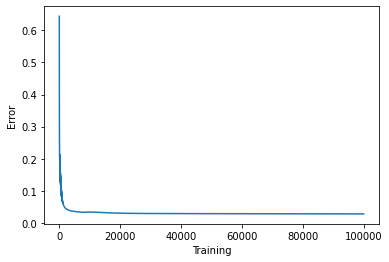

Training Accuracy 97.17%
Validation Accuracy 97.23%


In [44]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

perceptron = Perceptron(x,y,normalize=True)
perceptron.train()

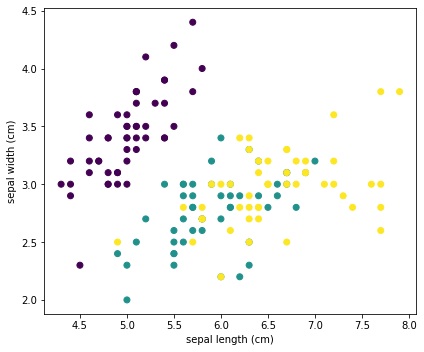

In [8]:
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.figure(figsize=(6, 5))
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.tight_layout()
plt.show()